## Image Processing in Python

Beginner friendly Image Processing Tutorials in Python.

In [22]:
import matplotlib.pyplot as plt

In [2]:
puppy = plt.imread('puppy.png')

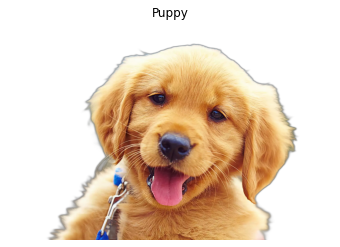

In [5]:
plt.imshow(puppy)
plt.axis('off')
plt.title('Puppy')
plt.show()

### Reduce Noise

In [3]:
n_image = plt.imread('nn.png')

In [8]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral

In [11]:
d_image = denoise_tv_chambolle(n_image, 
                               weight=0.1,
                               multichannel=True)

<ipython-input-11-c7714e01385c>:1: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  d_image = denoise_tv_chambolle(n_image,


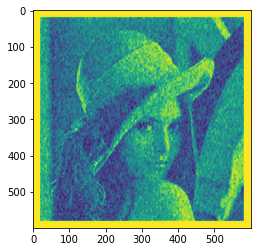

In [12]:
plt.imshow(d_image)
plt.show()

<ipython-input-14-64c144f6a7e6>:1: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  d_i = denoise_bilateral(n_image, multichannel=False)


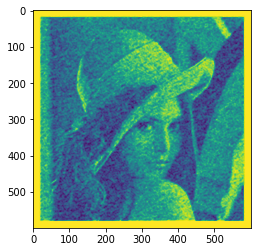

In [14]:
d_i = denoise_bilateral(n_image, multichannel=False)
plt.imshow(d_i)
plt.show()

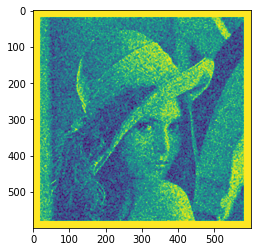

In [15]:
plt.imshow(n_image)
plt.show()

In [54]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [18]:
from skimage.io import imread

In [19]:
from skimage import data

# import the classifier class
from skimage.feature import Cascade

# load the trained file from the module
trained_file = data.lbp_frontal_face_cascade_filename()

# initialize the detector cascade
detector = Cascade(trained_file)

In [21]:
def getFaceRectangle(image, d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face= image[ x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] = gaussian_image
    return original

7


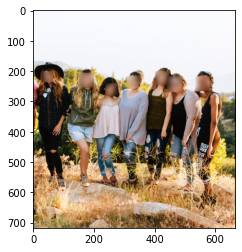

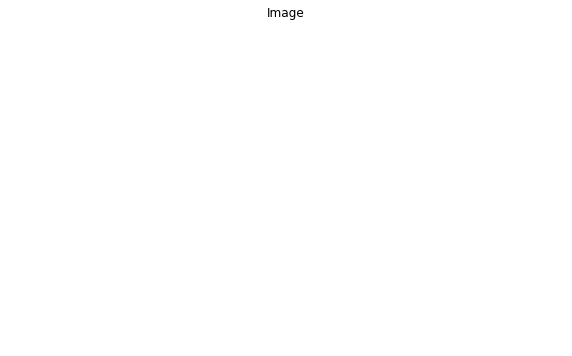

In [55]:
from skimage.filters import gaussian

group_image = imread('ff.jpg')

# Detect the faces
detected = detector.detect_multi_scale(img=group_image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10), max_size=(100, 100))

print(len(detected))

# For each detected face
for d in detected:
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(group_image, d)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, channel_axis=2, sigma=8, preserve_range=True)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face)

# plt.imshow(resulting_image)
# plt.show()
show_image(resulting_image)

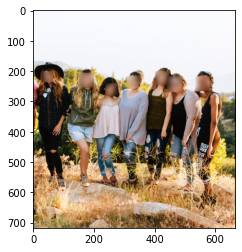

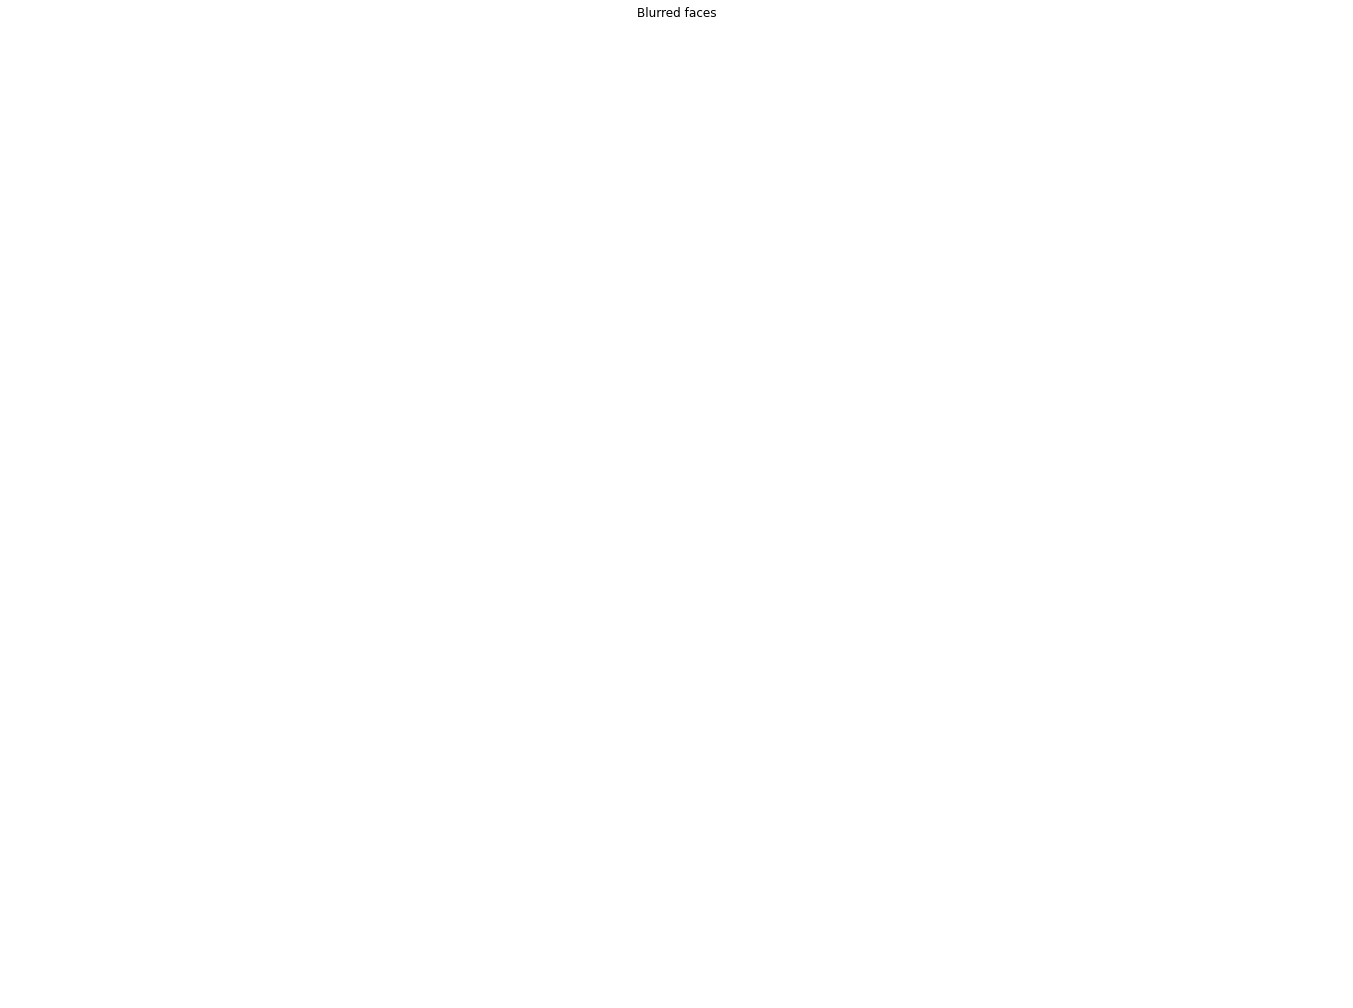

In [51]:
show_image(resulting_image, 'Blurred faces')